In [9]:
import pandas as pd
from lib.data_utils import fetch_and_prepare_data

sample_size = 100
try:
    data_df = pd.read_csv('data_samples/paragraph-questions-100.csv')
    print('Dataset already exists.')
except FileNotFoundError:
    data_df = await fetch_and_prepare_data(sample_size)
    data_df.to_csv('data_samples/paragraph-questions-100.csv', index=False)
data_df

Dataset already exists.


,_sa_instance_state_question,id_question,context,author_id,upvote,turns,paragraph_id,text_question,scope,timestamp,...,question_id,author_id_answer,timestamp_answer,_sa_instance_state_rating,id_rating,answer_id,timestamp_rating,text_rating,author_id_rating,value
0,<sqlalchemy.orm.state.InstanceState object at ...,412164,"In an article about 'Photography in Denmark', ...",8,0,single,386069,What is the name of the museum located in Oden...,single-paragraph,2024-05-06 13:38:58,...,412164,6,2024-05-06 13:39:08,<sqlalchemy.orm.state.InstanceState object at ...,823129,823290,2024-05-06 13:39:15,This answer is fully accurate and detailed. Th...,7,5
1,<sqlalchemy.orm.state.InstanceState object at ...,756098,"In an article about 'Antimony', section 'Appli...",8,0,single,1465,Which radioactive isotope of antimony is used ...,single-paragraph,2024-05-12 22:52:57,...,756098,6,2024-05-12 22:53:12,<sqlalchemy.orm.state.InstanceState object at ...,1552792,1552973,2024-05-12 22:53:17,This answer is fully accurate and detailed. It...,7,5
2,<sqlalchemy.orm.state.InstanceState object at ...,166548,"In an article about 'Bunnies & Burrows', secti...",8,0,single,528087,"Compared to the Original Dungeons & Dragons, h...",single-paragraph,2024-05-02 16:25:20,...,166548,6,2024-05-02 16:26:14,<sqlalchemy.orm.state.InstanceState object at ...,332056,332204,2024-05-02 16:26:23,The answer accurately quotes the original text...,7,5
3,<sqlalchemy.orm.state.InstanceState object at ...,878387,"In an article about 'Zach Parise', section 'Pe...",8,0,single,756738,"What is Zach Parise's relationship to Jordan, ...",single-paragraph,2024-05-16 11:32:22,...,878387,6,2024-05-16 11:32:24,<sqlalchemy.orm.state.InstanceState object at ...,1828007,1828206,2024-05-16 11:32:29,The provided answer is significantly incorrect...,7,1
4,<sqlalchemy.orm.state.InstanceState object at ...,514053,"In an article about 'Kurt Angle', section 'Pro...",8,0,single,584196,Who did Kurt Angle defeat in a thirty-minute I...,single-paragraph,2024-05-08 05:20:13,...,514053,6,2024-05-08 05:20:15,<sqlalchemy.orm.state.InstanceState object at ...,1035199,1035382,2024-05-08 05:20:19,The provided answer is completely incorrect. A...,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,<sqlalchemy.orm.state.InstanceState object at ...,559900,"In an article about 'Andalusian horse', sectio...",8,0,single,289381,What equestrian discipline did Andalusians hel...,single-paragraph,2024-05-09 00:40:00,...,559900,6,2024-05-09 00:40:12,<sqlalchemy.orm.state.InstanceState object at ...,1132364,1132541,2024-05-09 00:40:21,The answer accurately states that Andalusians ...,7,5
96,<sqlalchemy.orm.state.InstanceState object at ...,674935,"In an article about 'James Bond in film', sect...",8,0,single,104039,Where did principal photography for Goldfinger...,single-paragraph,2024-05-11 05:02:27,...,674935,6,2024-05-11 05:02:53,<sqlalchemy.orm.state.InstanceState object at ...,1377468,1377649,2024-05-11 05:03:00,"The answer ""Principal photography for Goldfing...",7,4
97,<sqlalchemy.orm.state.InstanceState object at ...,531897,"In an article about 'Lead poisoning', section ...",8,0,single,469109,What type of product made for pets has been kn...,single-paragraph,2024-05-08 12:46:30,...,531897,6,2024-05-08 12:47:36,<sqlalchemy.orm.state.InstanceState object at ...,1073046,1073223,2024-05-08 12:47:46,The provided answer is mostly correct and incl...,7,4
98,<sqlalchemy.orm.state.InstanceState object at ...,825657,"In an article about 'The Stolen Earth', sectio...",8,0,single,848366,What was the Appreciation Index score received...,single-paragraph,2024-05-14 23:31:15,...,825657,6,2024-05-14 23:31:24,<sqlalchemy.orm.state.InstanceState object at ...,1707344,1707537,2024-05-14 23:31:29,"This answer is fully accurate and detailed, pr...",7,5


In [10]:
from lib.llm_utils import generate_and_rate_answers
from fleecekmbackend.core.config import DATABASE_URL
from sqlalchemy.ext.asyncio import create_async_engine, AsyncSession
from sqlalchemy.orm import sessionmaker

try: 
    results_df = pd.read_csv('data_samples/paragraph-questions-100-short-answers-raw.csv')
    print('Results already exist.')
except:
    engine = create_async_engine(DATABASE_URL, echo=False)
    async_session = sessionmaker(engine, expire_on_commit=False, class_=AsyncSession)

    questions = data_df[['id_question', 'paragraph_id', 'text_question']].rename(columns={
            'id_question': 'id',
            'paragraph_id': 'paragraph_id',
            'text_question': 'text'
        }).to_dict(orient='records')

    async with async_session() as session:
        results_df = await generate_and_rate_answers(session, questions)
    results_df.to_csv('data_samples/paragraph-questions-100-short-answers-raw.csv', index=False)

# Merge the results with the original data_df
merged_df = pd.merge(data_df, results_df, left_on='id_question', right_on='question_id', how='left', suffixes=('_data', '_results'))

# Save the merged DataFrame to a CSV file
merged_df.to_csv('data_samples/paragraph-questions-100-short-answers.csv', index=False)

# Display the merged DataFrame
merged_df


Results already exist.


,_sa_instance_state_question,id_question,context,author_id,upvote,turns,paragraph_id,text_question,scope,timestamp,...,2_words_answer_id,2_words_answer_text,2_words_answer_rating_id,2_words_answer_rating_score,2_words_answer_rating_rationale,few_words_answer_id,few_words_answer_text,few_words_answer_rating_id,few_words_answer_rating_score,few_words_answer_rating_rationale
0,<sqlalchemy.orm.state.InstanceState object at ...,412164,"In an article about 'Photography in Denmark', ...",8,0,single,386069,What is the name of the museum located in Oden...,single-paragraph,2024-05-06 13:38:58,...,2344185.0,Danish,2343978.0,2.0,"The answer ""Danish"" is partially correct becau...",2344190.0,Danish Museum of Photographic Art.,2343983.0,5.0,"The answer ""Danish Museum of Photographic Art""..."
1,<sqlalchemy.orm.state.InstanceState object at ...,756098,"In an article about 'Antimony', section 'Appli...",8,0,single,1465,Which radioactive isotope of antimony is used ...,single-paragraph,2024-05-12 22:52:57,...,2344202.0,Antimony-124.,2343993.0,5.0,This answer is fully accurate and detailed. It...,2344207.0,Antimony-124.,2343999.0,5.0,This answer is fully accurate and detailed. It...
2,<sqlalchemy.orm.state.InstanceState object at ...,166548,"In an article about 'Bunnies & Burrows', secti...",8,0,single,528087,"Compared to the Original Dungeons & Dragons, h...",single-paragraph,2024-05-02 16:25:20,...,2344220.0,Light years.,2344013.0,5.0,"The answer ""Light years"" is a direct quote fro...",2344227.0,"""Light years"" ahead.",2344020.0,5.0,The answer provided is a direct quote from the...
3,<sqlalchemy.orm.state.InstanceState object at ...,878387,"In an article about 'Zach Parise', section 'Pe...",8,0,single,756738,"What is Zach Parise's relationship to Jordan, ...",single-paragraph,2024-05-16 11:32:22,...,2344238.0,Brother.,2344031.0,5.0,"The answer ""Brother"" is fully accurate and det...",2344242.0,Brother.,2344035.0,5.0,"The answer ""Brother"" is fully accurate and det..."
4,<sqlalchemy.orm.state.InstanceState object at ...,514053,"In an article about 'Kurt Angle', section 'Pro...",8,0,single,584196,Who did Kurt Angle defeat in a thirty-minute I...,single-paragraph,2024-05-08 05:20:13,...,2344249.0,Samoa Joe,2344042.0,5.0,"The answer ""Samoa Joe"" is fully accurate and d...",2344252.0,Samoa Joe.,2344045.0,5.0,"The answer provided, ""Samoa Joe"", is fully acc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,<sqlalchemy.orm.state.InstanceState object at ...,559900,"In an article about 'Andalusian horse', sectio...",8,0,single,289381,What equestrian discipline did Andalusians hel...,single-paragraph,2024-05-09 00:40:00,...,2346052.0,Dressage.,2345845.0,5.0,"The answer ""Dressage"" is fully accurate and de...",2346055.0,Classical dressage.,2345848.0,5.0,"The answer ""Classical dressage"" is fully accur..."
96,<sqlalchemy.orm.state.InstanceState object at ...,674935,"In an article about 'James Bond in film', sect...",8,0,single,104039,Where did principal photography for Goldfinger...,single-paragraph,2024-05-11 05:02:27,...,2346071.0,Miami.,2345864.0,5.0,"The answer ""Miami"" is fully accurate and detai...",2346075.0,"Miami, at the Fontainebleau Hotel.",2345867.0,5.0,This answer is fully accurate and detailed. It...
97,<sqlalchemy.orm.state.InstanceState object at ...,531897,"In an article about 'Lead poisoning', section ...",8,0,single,469109,What type of product made for pets has been kn...,single-paragraph,2024-05-08 12:46:30,...,2346084.0,Toys.,2345876.0,5.0,"The answer ""Toys"" is fully accurate and detail...",2346089.0,Toys.,2345882.0,5.0,"The answer ""Toys"" is fully accurate and detail..."
98,<sqlalchemy.orm.state.InstanceState object at ...,825657,"In an article about 'The Stolen Earth', sectio...",8,0,single,848366,What was the Appreciation Index score received...,single-paragraph,2024-05-14 23:31:15,...,2346099.0,"91, Excellent.",2345892.0,5.0,The answer provided is fully accurate and det

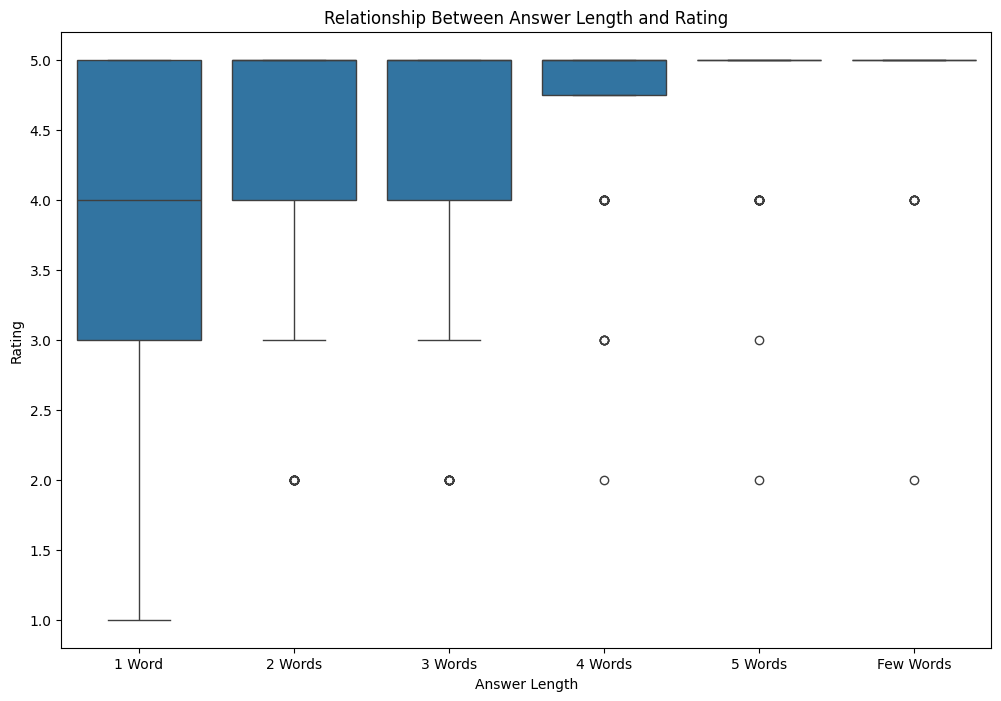

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged DataFrame
merged_df = pd.read_csv('data_samples/paragraph-questions-100-short-answers.csv')

# Prepare the data for visualization
# Extracting relevant columns and renaming for clarity
rating_columns = {
    '1_word_answer_rating_score': '1 Word',
    '2_words_answer_rating_score': '2 Words',
    '3_words_answer_rating_score': '3 Words',
    '4_words_answer_rating_score': '4 Words',
    '5_words_answer_rating_score': '5 Words',
    'few_words_answer_rating_score': 'Few Words'
}

# Select and rename columns
rating_data = merged_df[list(rating_columns.keys())].rename(columns=rating_columns)

# Melt the DataFrame to have a long-form DataFrame suitable for seaborn
melted_data = rating_data.melt(var_name='Answer Length', value_name='Rating')

# Plot the data
plt.figure(figsize=(12, 8))
ax = plt.subplot()

# Create boxplot
boxplot = sns.boxplot(x='Answer Length', y='Rating', data=melted_data, ax=ax)

# Set plot title and labels
ax.set_title('Relationship Between Answer Length and Rating')
ax.set_xlabel('Answer Length')
ax.set_ylabel('Rating')

# Show plot
plt.show()


In [25]:
merged_df[['context']]

,context
0,"In an article about 'Photography in Denmark', ..."
1,"In an article about 'Antimony', section 'Appli..."
2,"In an article about 'Bunnies & Burrows', secti..."
3,"In an article about 'Zach Parise', section 'Pe..."
4,"In an article about 'Kurt Angle', section 'Pro..."
...,...
95,"In an article about 'Andalusian horse', sectio..."
96,"In an article about 'James Bond in film', sect..."
97,"In an article about 'Lead poisoning', section ..."
98,"In an article about 'The Stolen Earth', sectio..."


In [28]:
import pandas as pd

# Load the merged DataFrame
merged_df = pd.read_csv('data_samples/paragraph-questions-100-short-answers.csv')

# Define a threshold for low rating scores
low_rating_threshold = 3

# Create a function to filter and format data for each answer length
def filter_low_ratings(df, answer_length):
    return df[df[f'{answer_length}_answer_rating_score'] < low_rating_threshold][[
        'context', 'text_cleaned', 'text_question',
        f'{answer_length}_answer_text', f'{answer_length}_answer_rating_score', f'{answer_length}_answer_rating_rationale'
    ]].rename(columns={
        f'{answer_length}_answer_text': 'answer_text',
        f'{answer_length}_answer_rating_score': 'rating_score',
        f'{answer_length}_answer_rating_rationale': 'rating_rationale'
    }).assign(answer_length=answer_length.replace('_', ' ').capitalize())

# List of answer lengths to check
answer_lengths = ['1_word', '2_words', '3_words', '4_words', '5_words', 'few_words']

# Concatenate all the filtered DataFrames
low_ratings_samples = pd.concat([filter_low_ratings(merged_df, length) for length in answer_lengths], ignore_index=True)

# Optionally, save the filtered samples to a CSV for further inspection
low_ratings_samples.to_csv('data_samples/low_ratings_samples.csv', index=False)

low_ratings_samples


,context,text_cleaned,text_question,answer_text,rating_score,rating_rationale,answer_length
0,"In an article about 'Photography in Denmark', ...","Danish Museum of Photographic Art , Odense .",What is the name of the museum located in Oden...,Danish.,2.0,"The answer ""Danish"" is partially correct becau...",1 word
1,"In an article about 'Kurt Angle', section 'Pro...","At Final Resolution , Angle was booked to defe...",Who did Kurt Angle defeat in a thirty-minute I...,Samoa,2.0,"The answer provided, ""Samoa"", is partially cor...",1 word
2,"In an article about 'Bridgewater Canal', secti...","George Loch , who had been opposed to using th...","What canal was built between 1858-59, connecti...",Runcorn.,2.0,"The answer ""Runcorn"" is partially correct beca...",1 word
3,"In an article about 'Misty Copeland', section ...","In 1997 , Copeland won the Los Angeles Music C...",Which company did Misty Copeland become a memb...,ABT's.,2.0,"The answer ""ABT's"" is partially correct becaus...",1 word
4,"In an article about 'Archaea', section 'Ecolog...","In the sulfur cycle , archaea that grow by oxi...",What is the byproduct of sulfur oxidation by a...,Acid.,2.0,"The answer ""Acid"" is partially correct, as it ...",1 word
5,"In an article about 'Candida ( song )', sectio...",""" Candida "" was the first single released by t...","Who produced ""Candida"" for Bell Records?",Appell,2.0,"The answer ""Appell"" is partially correct becau...",1 word
6,"In an article about 'Characters of Myst', sect...","On Riven Atrus meets Catherine , a local inhab...","Who does Atrus meet on Riven, and what is her ...",Catherine.,2.0,"The answer provided, ""Catherine"", is partially...",1 word
7,"In an article about 'Animal coloration', secti...",According to Charles Darwin 's 1859 theory of ...,What happens to individuals with slightly bett...,Leave.,2.0,"The answer ""Leave"" is partially correct, but i...",1 word
8,"In an article about 'The Coral Island', sectio...",The major themes of the novel revolve around t...,"What is the basic subject of ""The Coral Island...",Castaways.,2.0,"The answer ""Castaways"" is partially correct, a...",1 word
9,In an article about 'Landscape painting in Sco...,"In the Victorian era , the tradition of Highla...",What was the title of the 1851 painting by Edw...,Monarch,2.0,"The answer provided, ""Monarch"", is partially c...",1 word
